## Introdução

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [815]:
'''import libraries'''
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [816]:
'''Load CSVs'''
energia_2021 = pd.read_csv('./competition/energia_202109-202112.csv')
energia_2022 = pd.read_csv('./competition/energia_202201-202212.csv')
meteo_2021 = pd.read_csv('./competition/meteo_202109-202112.csv')
meteo_2022 = pd.read_csv('./competition/meteo_202201-202212.csv')
teste_meteo_2023 = pd.read_csv('./competition/meteo_202301-202304.csv')
teste_energia_2023 = pd.read_csv('./competition/energia_202301-202304.csv')


## Análise dos Dados

### Datasets Energia

In [817]:
energia_2021.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,NaN
1,2021-09-29,1,0.0,0.0,0.0,NaN
2,2021-09-29,2,0.0,0.0,0.0,NaN
3,2021-09-29,3,0.0,0.0,0.0,NaN
4,2021-09-29,4,0.0,0.0,0.0,NaN


In [818]:
energia_2022.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2022-01-01,0,0.0,0.486,0.0,NaN
1,2022-01-01,1,0.0,0.429,0.0,NaN
2,2022-01-01,2,0.0,0.463,0.0,NaN
3,2022-01-01,3,0.0,0.545,0.0,NaN
4,2022-01-01,4,0.0,0.439,0.0,NaN


In [819]:
energia_2021.info()
print("\n")
energia_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injeção na rede (kWh)    566 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     8760 non-null   object 
 1   Hora                     8760 non-null   int64  
 2   Normal (kWh)             8760 non-null   float64
 3   Horário Económi

In [820]:
'''
Verificar a quantidade de Missing Values em cada dataset
'''

print(energia_2021.isnull().sum()) # 1690 em 2256 na feature target
print("\n")
print(energia_2022.isnull().sum()) # 6087 em 8769 na feature target

Data                          0
Hora                          0
Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Injeção na rede (kWh)      1690
dtype: int64


Data                          0
Hora                          0
Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Injeção na rede (kWh)      6087
dtype: int64


<Axes: >

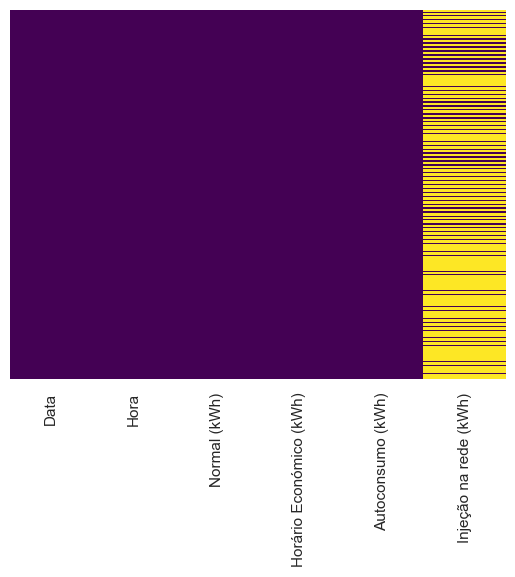

In [821]:
sns.heatmap(energia_2021.isnull(),yticklabels=False,cbar=False,cmap='viridis')


<Axes: >

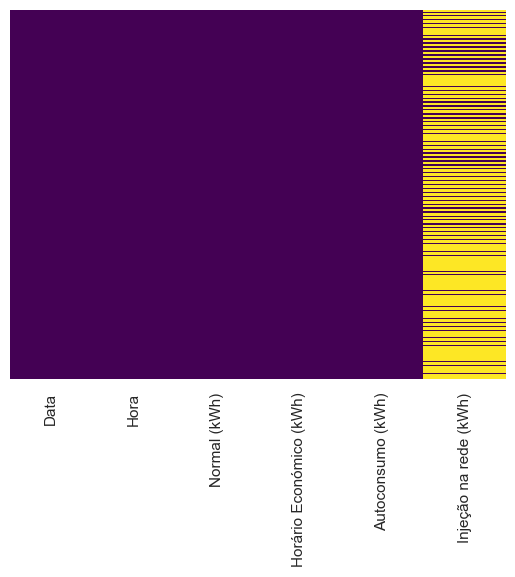

In [822]:
sns.heatmap(energia_2021.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [823]:
'''
Verificar a quantidade de valores únicos em cada feature de cada dataset
'''
energia_2021.nunique()
print("\n")
energia_2022.nunique()

#for field in energia_2021:
#    print(f"{field}: {energia_2021[field].duplicated().sum()}")

#print("\n")

#for field in energia_2022:
#    print(f"{field}: {energia_2022[field].duplicated().sum()}")

Data                        365
Hora                         24
Normal (kWh)               1132
Horário Económico (kWh)     789
Autoconsumo (kWh)           712
Injeção na rede (kWh)         4
dtype: int64

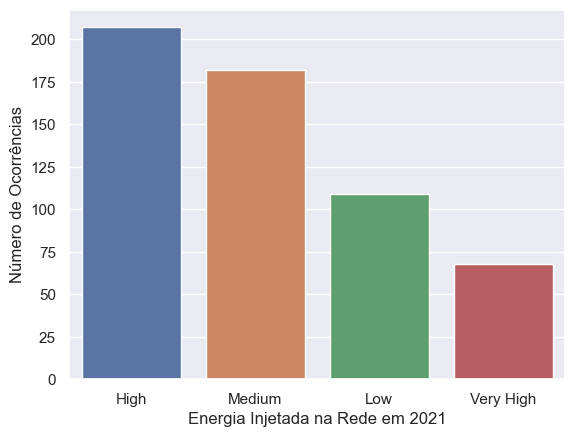

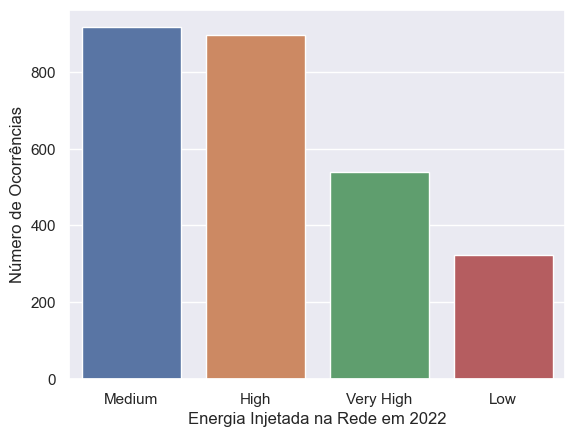

In [824]:
'''
Analisar a feature "Injeção na Rede"
'''

#2021
energia_2021_count = energia_2021["Injeção na rede (kWh)"].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=energia_2021_count.index, y=energia_2021_count.values)
plt.title('')
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xlabel('Energia Injetada na Rede em 2021', fontsize=12)
plt.show()

# 2022
energia_2022_count = energia_2022["Injeção na rede (kWh)"].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=energia_2022_count.index, y=energia_2022_count.values)
plt.title('')
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xlabel('Energia Injetada na Rede em 2022', fontsize=12)
plt.show()

In [825]:
print(energia_2021.describe())
print("\n")
print(energia_2022.describe())

              Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)
count  2256.000000   2256.000000              2256.000000        2256.000000
mean     11.500000      0.305831                 0.123770           0.103501
std       6.923721      0.374957                 0.310305           0.169716
min       0.000000      0.000000                 0.000000           0.000000
25%       5.750000      0.000000                 0.000000           0.000000
50%      11.500000      0.242000                 0.000000           0.000000
75%      17.250000      0.459000                 0.000000           0.213250
max      23.000000      2.540000                 6.978000           1.016000


              Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)
count  8760.000000   8760.000000              8760.000000        8760.000000
mean     11.500000      0.175610                 0.168971           0.120871
std       6.922582      0.337526                 0.260172           0.1783

In [826]:
#print(f"Skewness: \n{energia_2021.skew()}")
#print(f"\nKurtosis: \n{energia_2021.kurt()}")

#print("\n")

#print(f"Skewness: \n{energia_2022.skew()}")
#print(f"\nKurtosis: \n{energia_2022.kurt()}")

### Datasets Meteorologia

In [827]:
meteo_2021.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [828]:
meteo_2022.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1640995200,2022-01-01 00:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,NaN,NaN,65,3.15,NaN,97,overcast clouds
1,1640998800,2022-01-01 01:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,NaN,NaN,65,3.14,NaN,58,broken clouds
2,1641002400,2022-01-01 02:00:00 +0000 UTC,local,16.59,16.03,15.67,16.72,1024,NaN,NaN,66,3.12,NaN,23,few clouds
3,1641006000,2022-01-01 03:00:00 +0000 UTC,local,13.59,12.75,11.61,16.16,1023,NaN,NaN,67,3.08,NaN,22,few clouds
4,1641009600,2022-01-01 04:00:00 +0000 UTC,local,14.97,14.27,14.72,15.66,1023,NaN,NaN,67,3.12,NaN,15,few clouds


In [829]:
meteo_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   city_name            2928 non-null   object 
 3   temp                 2928 non-null   float64
 4   feels_like           2928 non-null   float64
 5   temp_min             2928 non-null   float64
 6   temp_max             2928 non-null   float64
 7   pressure             2928 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             2928 non-null   int64  
 11  wind_speed           2928 non-null   float64
 12  rain_1h              537 non-null    float64
 13  clouds_all           2928 non-null   int64  
 14  weather_description  2928 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

In [830]:
meteo_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   8760 non-null   int64  
 1   dt_iso               8760 non-null   object 
 2   city_name            8760 non-null   object 
 3   temp                 8760 non-null   float64
 4   feels_like           8760 non-null   float64
 5   temp_min             8760 non-null   float64
 6   temp_max             8760 non-null   float64
 7   pressure             8760 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             8760 non-null   int64  
 11  wind_speed           8760 non-null   float64
 12  rain_1h              1898 non-null   float64
 13  clouds_all           8760 non-null   int64  
 14  weather_description  8760 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

<Axes: >

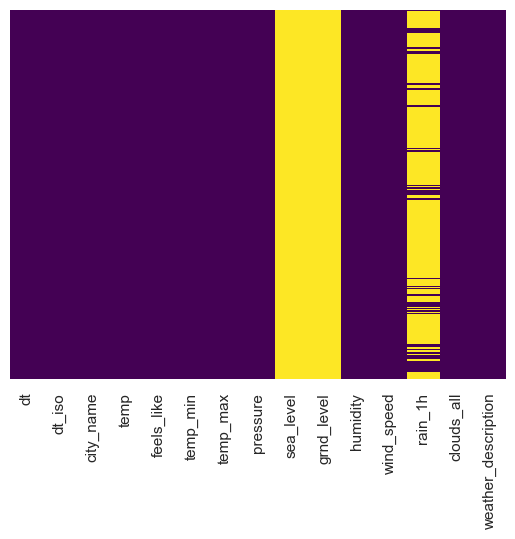

In [831]:
sns.heatmap(meteo_2021.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [832]:
meteo_2021.isnull().sum()

dt                        0
dt_iso                    0
city_name                 0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              2928
grnd_level             2928
humidity                  0
wind_speed                0
rain_1h                2391
clouds_all                0
weather_description       0
dtype: int64

<Axes: >

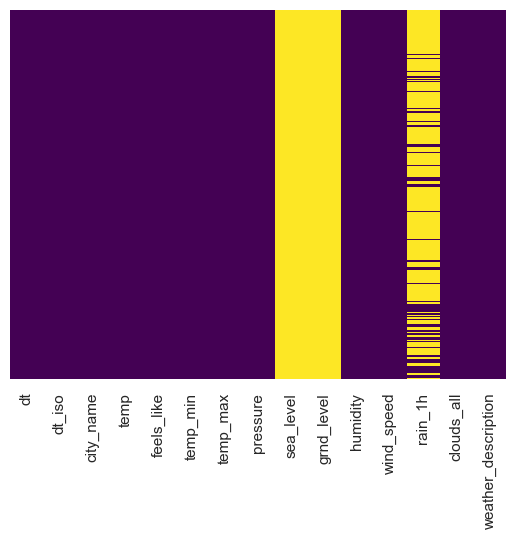

In [833]:
sns.heatmap(meteo_2022.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [834]:
meteo_2022.isnull().sum()

dt                        0
dt_iso                    0
city_name                 0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              8760
grnd_level             8760
humidity                  0
wind_speed                0
rain_1h                6862
clouds_all                0
weather_description       0
dtype: int64

In [835]:
meteo_2021.nunique()

dt                     2928
dt_iso                 2928
city_name                 1
temp                   1279
feels_like             1476
temp_min                262
temp_max                256
pressure                 35
sea_level                 0
grnd_level                0
humidity                 70
wind_speed              569
rain_1h                 173
clouds_all              101
weather_description       8
dtype: int64

In [836]:
meteo_2022.nunique()

dt                     8760
dt_iso                 8760
city_name                 1
temp                   2277
feels_like             2585
temp_min                424
temp_max                511
pressure                 41
sea_level                 0
grnd_level                0
humidity                 82
wind_speed              761
rain_1h                 347
clouds_all              101
weather_description       8
dtype: int64

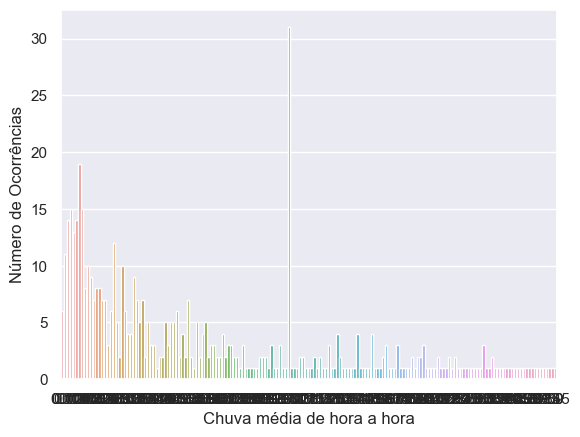

In [837]:
rain_1h_count = meteo_2021['rain_1h'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=rain_1h_count.index, y=rain_1h_count.values)
plt.title('')
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xlabel('Chuva média de hora a hora', fontsize=12)
plt.show()

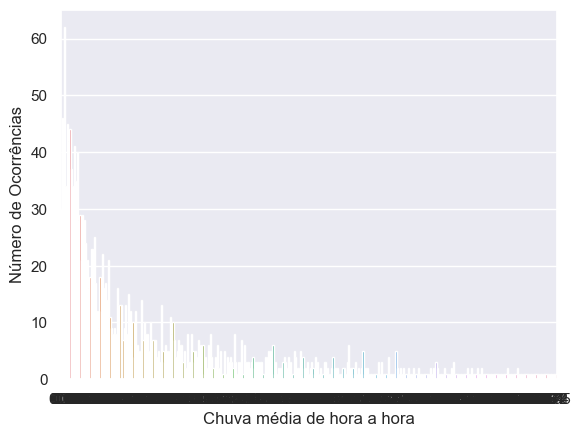

In [838]:
rain_1h_count = meteo_2022['rain_1h'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=rain_1h_count.index, y=rain_1h_count.values)
plt.title('')
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xlabel('Chuva média de hora a hora', fontsize=12)
plt.show()

## Tratamento dos Dados

### Simplificação dos nomes das features

In [839]:
# Energia 2021
energia_2021.rename(columns={"Normal (kWh)": "Normal"}, inplace=True)
energia_2021.rename(columns={"Horário Económico (kWh)": "Horário Económico"}, inplace=True)
energia_2021.rename(columns={"Autoconsumo (kWh)": "Autoconsumo"}, inplace=True)
energia_2021.rename(columns={"Injeção na rede (kWh)": "Injeção na rede"}, inplace=True)

energia_2021.columns

Index(['Data', 'Hora', 'Normal', 'Horário Económico', 'Autoconsumo',
       'Injeção na rede'],
      dtype='object')

In [840]:
# Energia 2022
energia_2022.rename(columns={"Normal (kWh)": "Normal"}, inplace=True)
energia_2022.rename(columns={"Horário Económico (kWh)": "Horário Económico"}, inplace=True)
energia_2022.rename(columns={"Autoconsumo (kWh)": "Autoconsumo"}, inplace=True)
energia_2022.rename(columns={"Injeção na rede (kWh)": "Injeção na rede"}, inplace=True)

energia_2022.columns

Index(['Data', 'Hora', 'Normal', 'Horário Económico', 'Autoconsumo',
       'Injeção na rede'],
      dtype='object')

### Alteração de datas

#### Dataset Energia

Conversão do tipo de dados da coluna "Data" para o tipo "datetime"

In [841]:
e_2021_1 = energia_2021.copy()

In [842]:
e_2021_1['Data'] = pd.to_datetime(e_2021_1['Data'], format='%Y-%m-%d', errors='coerce')
assert e_2021_1['Data'].isnull().sum() == 0, 'missing Data'
e_2021_1['Data'].head()

0   2021-09-29
1   2021-09-29
2   2021-09-29
3   2021-09-29
4   2021-09-29
Name: Data, dtype: datetime64[ns]

In [843]:
e_2022_1 = energia_2022.copy()

In [844]:
e_2022_1['Data'] = pd.to_datetime(e_2022_1['Data'], format='%Y-%m-%d', errors='coerce')
assert e_2022_1['Data'].isnull().sum() == 0, 'missing Data'
e_2022_1['Data'].head()

0   2022-01-01
1   2022-01-01
2   2022-01-01
3   2022-01-01
4   2022-01-01
Name: Data, dtype: datetime64[ns]

Criação de várias colunas com as partes extraídas da Data

In [845]:
e_2021_1['Ano'] = e_2021_1['Data'].dt.year 
e_2021_1['Mês'] = e_2021_1['Data'].dt.month 
e_2021_1['Dia'] = e_2021_1['Data'].dt.day
e_2021_1.head()

,Data,Hora,Normal,Horário Económico,Autoconsumo,Injeção na rede,Ano,Mês,Dia
0,2021-09-29,0,0.0,0.0,0.0,NaN,2021,9,29
1,2021-09-29,1,0.0,0.0,0.0,NaN,2021,9,29
2,2021-09-29,2,0.0,0.0,0.0,NaN,2021,9,29
3,2021-09-29,3,0.0,0.0,0.0,NaN,2021,9,29
4,2021-09-29,4,0.0,0.0,0.0,NaN,2021,9,29


In [846]:
e_2022_1['Ano'] = e_2022_1['Data'].dt.year 
e_2022_1['Mês'] = e_2022_1['Data'].dt.month 
e_2022_1['Dia'] = e_2022_1['Data'].dt.day
e_2022_1.head()

,Data,Hora,Normal,Horário Económico,Autoconsumo,Injeção na rede,Ano,Mês,Dia
0,2022-01-01,0,0.0,0.486,0.0,NaN,2022,1,1
1,2022-01-01,1,0.0,0.429,0.0,NaN,2022,1,1
2,2022-01-01,2,0.0,0.463,0.0,NaN,2022,1,1
3,2022-01-01,3,0.0,0.545,0.0,NaN,2022,1,1
4,2022-01-01,4,0.0,0.439,0.0,NaN,2022,1,1


In [847]:
e_2021_1.nunique()

Data                  94
Hora                  24
Normal               772
Horário Económico    329
Autoconsumo          440
Injeção na rede        4
Ano                    1
Mês                    4
Dia                   31
dtype: int64

In [848]:
e_2022_1.nunique()

Data                  365
Hora                   24
Normal               1132
Horário Económico     789
Autoconsumo           712
Injeção na rede         4
Ano                     1
Mês                    12
Dia                    31
dtype: int64

#### Dataset Meteorologia

In [849]:
meteo_2021.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [850]:
m_2021_1 = meteo_2021.copy()
m_2021_1['dt_iso'] = pd.to_datetime(m_2021_1['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC', errors='coerce')
assert m_2021_1['dt_iso'].isnull().sum() == 0, 'missing dt_iso'
m_2021_1['dt_iso'].head()

0   2021-09-01 00:00:00+00:00
1   2021-09-01 01:00:00+00:00
2   2021-09-01 02:00:00+00:00
3   2021-09-01 03:00:00+00:00
4   2021-09-01 04:00:00+00:00
Name: dt_iso, dtype: datetime64[ns, UTC]

In [851]:
m_2022_1 = meteo_2022.copy()
m_2022_1['dt_iso'] = pd.to_datetime(m_2022_1['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC', errors='coerce')
assert m_2022_1['dt_iso'].isnull().sum() == 0, 'missing dt_iso'
m_2022_1['dt_iso'].head()

0   2022-01-01 00:00:00+00:00
1   2022-01-01 01:00:00+00:00
2   2022-01-01 02:00:00+00:00
3   2022-01-01 03:00:00+00:00
4   2022-01-01 04:00:00+00:00
Name: dt_iso, dtype: datetime64[ns, UTC]

In [852]:
m_2021_1['Ano'] = m_2021_1['dt_iso'].dt.year 
m_2021_1['Mês'] = m_2021_1['dt_iso'].dt.month 
m_2021_1['Dia'] = m_2021_1['dt_iso'].dt.day
m_2021_1['Hora'] = m_2021_1['dt_iso'].dt.hour 
m_2021_1['Minuto'] = m_2021_1['dt_iso'].dt.minute 
m_2021_1['Segundo'] = m_2021_1['dt_iso'].dt.second
m_2021_1['Timezone'] = m_2021_1['dt_iso'].dt.tz

m_2021_1.tail()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,...,rain_1h,clouds_all,weather_description,Ano,Mês,Dia,Hora,Minuto,Segundo,Timezone
2923,1640977200,2021-12-31 19:00:00+00:00,local,16.72,16.35,16.22,17.79,1024,NaN,NaN,...,NaN,91,overcast clouds,2021,12,31,19,0,0,UTC
2924,1640980800,2021-12-31 20:00:00+00:00,local,16.54,16.10,15.67,17.23,1024,NaN,NaN,...,NaN,97,overcast clouds,2021,12,31,20,0,0,UTC
2925,1640984400,2021-12-31 21:00:00+00:00,local,15.71,15.09,15.66,16.22,1023,NaN,NaN,...,NaN,94,overcast clouds,2021,12,31,21,0,0,UTC
2926,1640988000,2021-12-31 22:00:00+00:00,local,16.59,15.98,16.21,16.72,1024,NaN,NaN,...,NaN,83,broken clouds,2021,12,31,22,0,0,UTC
2927,1640991600,2021-12-31 23:00:00+00:00,local,16.59,16.00,16.21,16.72,1024,NaN,NaN,...,NaN,95,overcast clouds,2021,12,31,23,0,0,UTC


In [853]:
m_2022_1['Ano'] = m_2022_1['dt_iso'].dt.year 
m_2022_1['Mês'] = m_2022_1['dt_iso'].dt.month 
m_2022_1['Dia'] = m_2022_1['dt_iso'].dt.day
m_2022_1['Hora'] = m_2022_1['dt_iso'].dt.hour 
m_2022_1['Minuto'] = m_2022_1['dt_iso'].dt.minute 
m_2022_1['Segundo'] = m_2022_1['dt_iso'].dt.second
m_2022_1['Timezone'] = m_2022_1['dt_iso'].dt.tz

m_2022_1.tail()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,...,rain_1h,clouds_all,weather_description,Ano,Mês,Dia,Hora,Minuto,Segundo,Timezone
8755,1672513200,2022-12-31 19:00:00+00:00,local,15.70,15.57,15.57,15.72,1018,NaN,NaN,...,3.58,100,moderate rain,2022,12,31,19,0,0,UTC
8756,1672516800,2022-12-31 20:00:00+00:00,local,15.55,15.43,12.72,15.70,1018,NaN,NaN,...,4.20,100,heavy intensity rain,2022,12,31,20,0,0,UTC
8757,1672520400,2022-12-31 21:00:00+00:00,local,13.45,13.28,12.23,13.99,1019,NaN,NaN,...,4.23,100,heavy intensity rain,2022,12,31,21,0,0,UTC
8758,1672524000,2022-12-31 22:00:00+00:00,local,12.93,12.73,12.23,13.43,1019,NaN,NaN,...,3.90,100,moderate rain,2022,12,31,22,0,0,UTC
8759,1672527600,2022-12-31 23:00:00+00:00,local,12.93,12.76,12.23,13.43,1019,NaN,NaN,...,4.07,100,heavy intensity rain,2022,12,31,23,0,0,UTC


In [854]:
m_2021_1.nunique()

dt                     2928
dt_iso                 2928
city_name                 1
temp                   1279
feels_like             1476
temp_min                262
temp_max                256
pressure                 35
sea_level                 0
grnd_level                0
humidity                 70
wind_speed              569
rain_1h                 173
clouds_all              101
weather_description       8
Ano                       1
Mês                       4
Dia                      31
Hora                     24
Minuto                    1
Segundo                   1
Timezone                  1
dtype: int64

In [855]:
m_2022_1.nunique()

dt                     8760
dt_iso                 8760
city_name                 1
temp                   2277
feels_like             2585
temp_min                424
temp_max                511
pressure                 41
sea_level                 0
grnd_level                0
humidity                 82
wind_speed              761
rain_1h                 347
clouds_all              101
weather_description       8
Ano                       1
Mês                      12
Dia                      31
Hora                     24
Minuto                    1
Segundo                   1
Timezone                  1
dtype: int64

Provar que ambas as colunas são iguais

In [856]:
m_2021_3 = m_2022_1.copy()
m_2021_3['dt'] = pd.to_datetime(m_2021_3['dt'], unit='s', utc=True)

# Verificar se as colunas são exatamente iguais
print(m_2021_3['dt'].equals(m_2021_3['dt_iso']))


True


### Remoção de features

#### Dataset Energia

In [857]:
e_2021_1.drop(['Ano','Data'],axis=1,inplace=True)
#e_2021_1.dropna(inplace=True)
e_2021_1.head()

,Hora,Normal,Horário Económico,Autoconsumo,Injeção na rede,Mês,Dia
0,0,0.0,0.0,0.0,NaN,9,29
1,1,0.0,0.0,0.0,NaN,9,29
2,2,0.0,0.0,0.0,NaN,9,29
3,3,0.0,0.0,0.0,NaN,9,29
4,4,0.0,0.0,0.0,NaN,9,29


In [858]:
e_2022_1.drop(['Ano','Data'],axis=1,inplace=True)
#e_2022_1.dropna(inplace=True)
e_2022_1.head()

,Hora,Normal,Horário Económico,Autoconsumo,Injeção na rede,Mês,Dia
0,0,0.0,0.486,0.0,NaN,1,1
1,1,0.0,0.429,0.0,NaN,1,1
2,2,0.0,0.463,0.0,NaN,1,1
3,3,0.0,0.545,0.0,NaN,1,1
4,4,0.0,0.439,0.0,NaN,1,1


#### Dataset Meteorologia

In [859]:
m_2021_1.drop(['city_name','sea_level','grnd_level','dt_iso','Ano','Minuto','Segundo','Timezone','dt'], axis=1, inplace=True)
m_2021_1.head()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,Mês,Dia,Hora
0,18.74,18.84,15.72,20.34,1015,83,1.18,NaN,78,broken clouds,9,1,0
1,18.73,18.83,15.72,20.34,1014,83,1.46,NaN,92,overcast clouds,9,1,1
2,17.84,17.98,16.72,20.34,1014,88,1.05,NaN,91,overcast clouds,9,1,2
3,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain,9,1,3
4,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain,9,1,4


In [860]:
m_2022_1.drop(['city_name','sea_level','grnd_level','dt_iso','Ano','Minuto','Segundo','Timezone','dt'], axis=1, inplace=True)
m_2022_1.head()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,Mês,Dia,Hora
0,16.59,16.00,16.21,16.72,1024,65,3.15,NaN,97,overcast clouds,1,1,0
1,16.59,16.00,16.21,16.72,1024,65,3.14,NaN,58,broken clouds,1,1,1
2,16.59,16.03,15.67,16.72,1024,66,3.12,NaN,23,few clouds,1,1,2
3,13.59,12.75,11.61,16.16,1023,67,3.08,NaN,22,few clouds,1,1,3
4,14.97,14.27,14.72,15.66,1023,67,3.12,NaN,15,few clouds,1,1,4


In [861]:
m_2021_2 = meteo_2021.copy()
m_2021_2.drop(['city_name','sea_level','grnd_level','dt_iso'], axis=1, inplace=True)
m_2021_2.columns

Index(['dt', 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'rain_1h', 'clouds_all',
       'weather_description'],
      dtype='object')

In [862]:
m_2022_2 = meteo_2022.copy()
m_2022_2.drop(['city_name','sea_level','grnd_level','dt_iso'], axis=1, inplace=True)
m_2022_2.columns

Index(['dt', 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'rain_1h', 'clouds_all',
       'weather_description'],
      dtype='object')

### Converter tipos de dados categóricos para numéricos

#### Dataset Energia (Injeção na rede)

In [ ]:
# Factorize


In [ ]:
# One-Hot encoding


#### Dataset Meteorologia (weather_description)

In [ ]:
# Factorize


In [ ]:
# One-Hot encoding


### Tratamento de Outliers

### Tratamento de Missing Values

### Normalizar?

### Exploratory Data Analysis 

In [863]:
fig = plt.figure(figsize = (10,10))
incidents_corr = m_2021_1.corr(method = 'pearson')
sns.heatmap(incidents_corr, linecolor = 'black', linewidths = 0.5)

ValueError: could not convert string to float: 'broken clouds'

<Figure size 1000x1000 with 0 Axes>

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


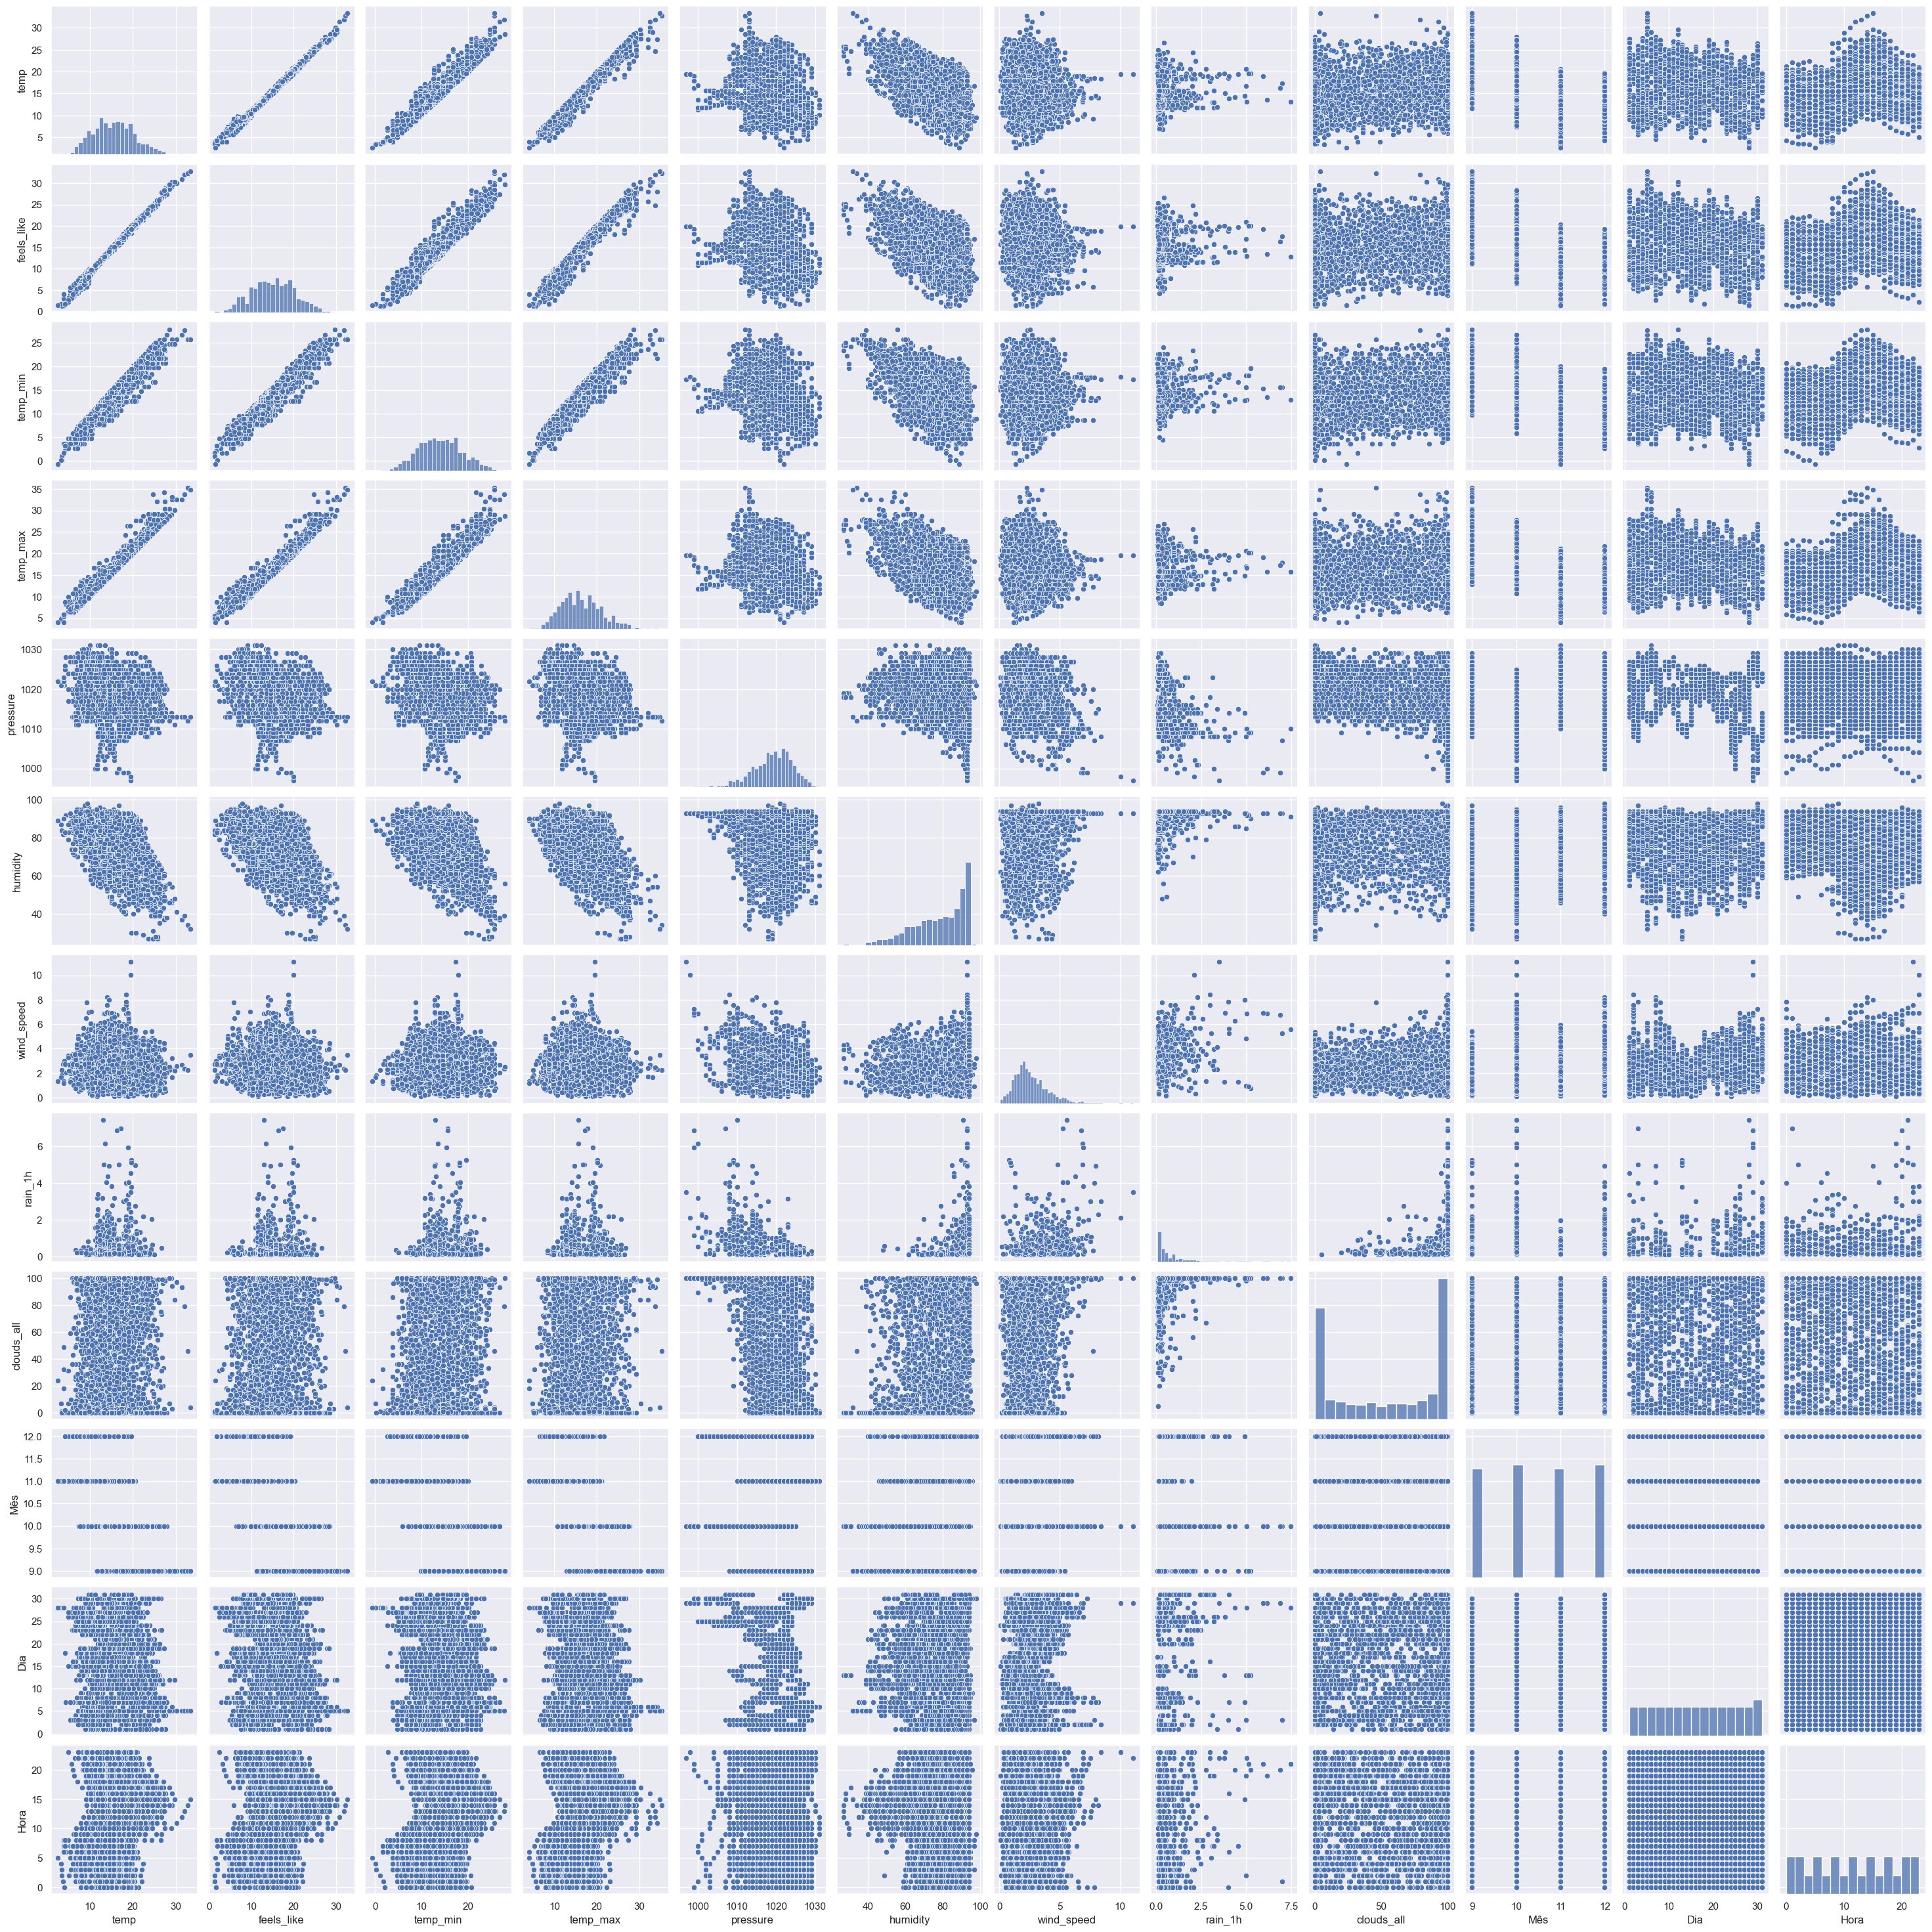

In [ ]:
sns.pairplot(m_2021_1)